# Práctica 10 - Esturcturas de Datos y Algoritmos I

### Estrategias para construir algoritmos I (Algoritmos voraces y fuerza bruta).

#### Algoritmos de Fuerza Bruta o Búsqueda exhaustiva

La estrategia de búsqueda exhaustiva consiste en generar la mayor cantidad de posibles soluciones para el problema con el fin de encontrar alguna que dé con la tecla mediante ciertos procesos, es decirn, buscar en todo nuestro conjunto. 

Casi cualquier problema se puede modelar computacionalmente con fuerza bruta, ya que esta se asemeja el pensamiento humano, debido a que para nosotros, muchas veces la mejor solución es analizar todo a nuestra deisposición para llegar al resultado esperado, como en algunas soluciones o procedimientos matemáticos.

Se puede pensar que una solución de fuerza bruta no es óptima, sin embargo, en muchas ocasiones, va a ser eficiente el emplear un algoritmo creado con búsqueda exhaustiva, así como sencillo de implementar, incluso, pueden existir casos en los que esta técnica sea nuestra única opción.

#### Algoritmo para encontrar el par más cercano de puntos en un plano por fuerza bruta


In [1]:
import numpy as np

#                               Explicación | Análisis temporal | Análisis espacial

def closest(array):
    result = {} # Inicializamos un diccionario de resultados | 3 | 1
    result["p1"] = array[0] # Inicializamos el punto 1 de nuestro diccionario como el primer elemento de la lista
                            # 4 | 1
    result["p2"] = array[1] # Inicializamos el punto 2 de nuestro diccionario como el segundo elemento de la lista
                            # 4 | 1
    result["distance"] = np.sqrt((array[0][0] - array[1][0]) ** 2 
                                 + (array[0][1] - array[1][1]) ** 2) 
    
    # Incializamos un campo "distancia en el diccionario" que va a representar la cantidad numérica de 
    # la distancia entre los dos puntos, calculada mediante la fórmula de distancia que aprendemos en clases
    # de Geometría/Matemáticas, la cual está basada en el teorema de pitágoras
    # 8 | 1

    for i in range(len(array) - 1): # - | 3(n+1) siendo n el tamaño de la lista | 1
        for j in range(i + 1, len(array)): # - | 3(n*n) | 1
            
            # La comprobación se ejecutará n+1 veces pero al empezar una posición después respecto al iterador
            # anterior (i) se disminuye en 1 para el peor caso, entonces la comprobación se ejecuta n veces
            
            distance = np.sqrt((array[i][0] - array[j][0]) ** 2
                               + (array[i][1] - array[j][1]) ** 2)
            
            # Se calcula una distancia en cada iteración mediante la fórmula antes mencionada | 8 (n*n) | 1
            
            if distance < result["distance"]: # Compara si la distancia que tenemos es menor a la cantidad
                # de distancia calculada en la iteración previa, si no lo es actualiza los datos
                # 3(n*n) | 0
                
                result["p1"] = array[i] # 3(n*n) | 1
                result["p2"] = array[j] # 3(n*n) | 1
                result["distance"] = distance # 3(n*n) | 1
                
    return result # 1 | 1

# Polinomio temporal  23n^2 + 3n + 23 = O(n^2)
# Polinomio espacial 10 = O(1)

array = [(1, 2), (3, 4), (5, 6)]
result = closest(array)
print(result)


{'p1': (1, 2), 'p2': (3, 4), 'distance': 2.8284271247461903}


### Explicación

Este algoritmo va a comparar la distancia entre todos los puntos del plano, lo que nos llevará a recorrer dos veces nuestra lista de tuplas con las coordenadas del plano, generando una complejidad cuadrática.

Otra demostración, es el modelar todos los puntos del plano como un grafo, y cada medida de distancia será una conexión entre nodos (Guardando la menor), este sería un grafo completo, ya que todos los puntos están conectados por vértices que indican una medida ya generada. La teoría de grafos nos dice que un grafo completo tiene n(n-1)/2 aristas, en nuestro caso, comparaciones. Por lo tanto nuestro algoritmo es de complejidad cuadrática O(n^2).

### ¿Por qué la técnica es búsqueda exhaustiva?

Estamos comparando todos nuestros elementos entre sí, buscando la distancia mínima mediante probar todas las posibles combinaciones, buscando de manera completa entre todo el conjunto.

### Gráficas del algoritmo (Teórica vs empírica)

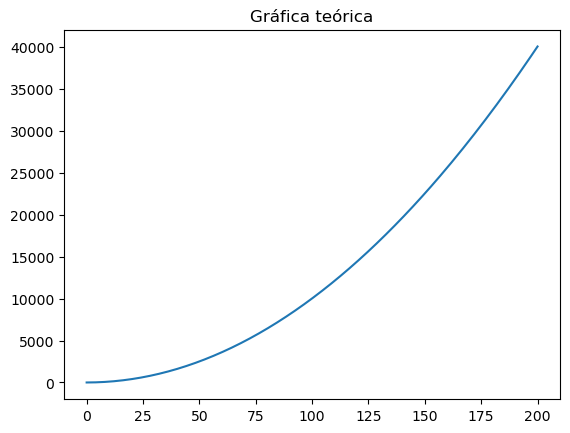

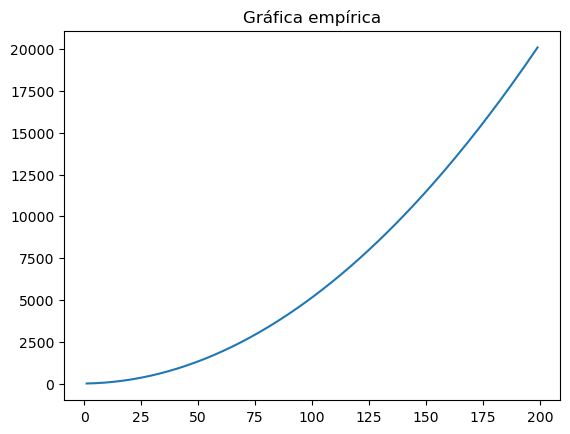

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import random

def closest(array):
    times = 0
    result = {} 
    result["p1"] = array[0] 
                            
    result["p2"] = array[1] 
    result["distance"] = np.sqrt((array[0][0] - array[1][0]) ** 2 
                                 + (array[0][1] - array[1][1]) ** 2) 
    
    for i in range(len(array) - 1): 
        for j in range(i + 1, len(array)):
            times += 1
            distance = np.sqrt((array[i][0] - array[j][0]) ** 2
                               + (array[i][1] - array[j][1]) ** 2)

            if distance < result["distance"]:
                
                result["p1"] = array[i] 
                result["p2"] = array[j] 
                result["distance"] = distance 
                
    return times


array = [(1,1), (1000,1000)]
n = 200
x = []
y = []

for i in range(1,n):
    value1 = random.randint(-1000, 1000)
    value2 = random.randint(-1000, 1000)
    
    pair = (value1, value2)
        
    array.append(pair)
    x.append(i)
    y.append(closest(array))

a = np.linspace(0, 200, 200)

polynomial = a**2 + 3/23 * a + 1

plt.plot(a, polynomial)
plt.title('Gráfica teórica')
plt.show()
plt.plot(x,y)
plt.title('Gráfica empírica')
plt.show()

# result = closest(array)
# print(result)

# Algoritmos voraces o Greedy.

Los algoritmos voraces, buscan solucionar problemas de selección y optimización para obtener una aproximación óptima y/o incluso la mejor solución para el problema. Se basan en efectuar la mejor decisión para el punto del problema en el que te encuentres, ya sea mínimo, máximo, promedio, etc.

Esto en múltiples ocasiones puede solucionar el problema de manera efectiva, sin embargo, en otras ocasiones nos veremos en la necesidad de contemplar otra estrategia en lugar de un algoritmo voraz.

### El problema de las monedas.

In [5]:
#                   | Análisis temporal | Análisis espacial


def mergeSort(arr):
    if len(arr) <= 1:# 4 | 1
        return arr # 1 | 1
    
    mid = len(arr) // 2 # 5 y nuestro n (El tamaño del arreglo se divide /2) | 1
    left = arr[:mid] # Se esta creando otro subarreglo | n/2 | n/2
    right = arr[mid:] # n/4 | n/2
    
    left = mergeSort(left) # Se llama a sí misma, entonces debido a su constatnte división entre 2 | log (n) | log(n)
    right = mergeSort(right)  # Se llama a sí misma, entonces debido a su constatnte división entre 2 | log (base 4) (n) | log(n)
    
    return merge(left, right) # 60n + 24 * (log(base 4)n + log n + 10)

def merge(left, right):
    result = [] # 3 | 1
    i = 0 # 3 | 1
    j = 0 # 3 | 1
    
    while i < len(left) and j < len(right): # 7(2n+2) | 0
        if left[i] < right[j]: # 4(2n) | 1
            result.append(left[i]) # 4(n) | n | Es n porque 2n = left + right
            i += 1 # 4(n) | 1
        else:
            result.append(right[j]) # 4(n) | 1
            j += 1 # 4(n) | 1
    
    while i < len(left): # 5(n) | 0
        result.append(left[i]) # 3(n) | n
        i += 1 # 3(n) | n
    
    while j < len(right): # 5(n) | 0
        result.append(right[j]) # 3(n) | n
        j += 1 # 3(n) | n
    
    return result # 1 | 1

# Polinomio Merge 60n + 24 = O(n)
# Polinomio MergeSort 60n + 24 * (log(base 4)n + log n + 10) = O(n log n)


def dar_cambio(monedas, monto):
    monedas = mergeSort(monedas) # 10 * n(log(base 4)n) + 10 * n(log n) + 100n + 4 log(base 4)n + 4(log n) + 40
    monedas.reverse() # n | 1
    cambio = [] # 3 | 1
    total = 0 # 3 | 1

    for moneda in monedas: # 4(n+1) | 1
        while total + moneda <= monto: #
            cambio.append(moneda) # 3 n log n | log n
            total += moneda # Se aumenta solo la cantidad de monedas así que es 4 n (log n) | log n

    return cambio

# Polinomio temporal  10 * n(log(base 4)n) + 17 10 * n(log n) + 105n + + 4 log(base 4)n + 4(log n) + 46
monedas = [25, 1, 10, 5]  
monto = 47  

resultado = dar_cambio(monedas, monto)
print(resultado)

[25, 10, 10, 1, 1]


## Explicación

El problema de las monedas, puede ser optimizado mediante un algortimo voraz, ya que siempre vamos a elegir la denominación de moneda más grande para restar de nuestro conjunto de denominaciones, lo que nos dará una solución óptima, más no la mejor.

## ¿Por qué es ávido?

Es voraz ya que estamos eligiendo siempre nuestra mejor opción (La denominación compatible con la cantidad que tenemos en la iteración i), construyendo una solución con pocas monedas, que para ciertos casos va a ser la mejor

## Gráficas del algortimo (Teórica vs empírica)

20


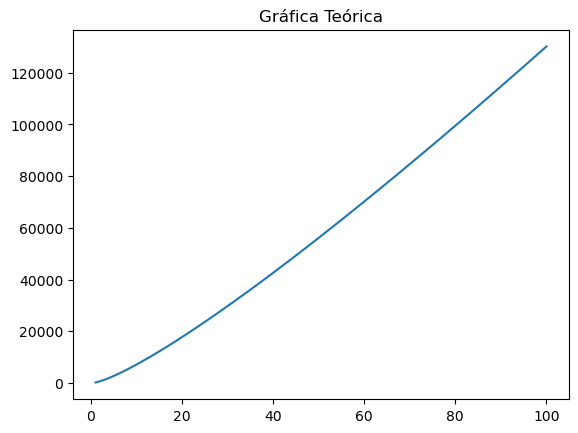

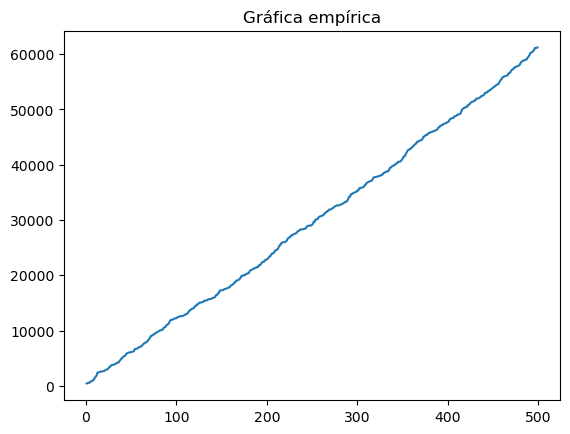

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
times = 0
def mergeSort(arr):
    global times
    if len(arr) <= 1:
        return arr
    
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    
    left = mergeSort(left)
    right = mergeSort(right)
    times += 1
    return merge(left, right)

def merge(left, right):
    global times
    result = []
    i = 0
    j = 0
    
    while i < len(left) and j < len(right):
        times += 1
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    
    while i < len(left):
        times += 1
        result.append(left[i])
        i += 1
    
    while j < len(right):
        times += 1
        result.append(right[j])
        j += 1
    
    return result


def dar_cambio(monedas, monto):
    global times
    monedas = mergeSort(monedas)
    monedas.reverse()
    cambio = []
    total = 0

    for moneda in monedas:
        times += 1
        while total + moneda <= monto:
            times += 1
            cambio.append(moneda)
            total += moneda

    return times

resultado = dar_cambio(monedas, monto)
print(resultado)

n = np.linspace(1, 100, 100)  # Adjust the range of n as per your requirements
y = 10 * n * (np.log2(n)) + 17 * 10 * n * np.log2(n) + 105 * n + 4 * (np.log2(n)) / (np.log2(4)) + 4 * np.log2(n) + 46
    
plt.plot(n, y)
plt.title('Gráfica Teórica')
plt.show()

m = 500
x = []
y = []

for i in range(1,m):
    coins = [1]
    amount = random.randint(10,500)
    randDen = random.randint(2,500)
    coins.append(randDen)
    x.append(i)
    y.append(dar_cambio(coins,amount))

plt.plot(x,y)
plt.title('Gráfica empírica')
plt.show()
